In [3]:
import csv
import sys
from casacore.tables import table
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import itertools
import numpy as np


In [4]:
np.set_printoptions(threshold='nan')

MSfile = '/data/users/kyle/Mishas_Data/M83_Flag'

t = table(MSfile,readonly=False)
print('\nMS: ', MSfile, '\n')
print(t.summary)

# print MS columns
print('MS tables: ', t.colnames(), '\n')


Successful read/write open of default-locked table /data/users/kyle/Mishas_Data/M83_Flag: 23 columns, 115500 rows
('\nMS: ', '/data/users/kyle/Mishas_Data/M83_Flag', '\n')
<bound method table.summary of <casacore.tables.table.table object at 0x7f3981c6cc58>>
('MS tables: ', ['UVW', 'FLAG', 'FLAG_CATEGORY', 'WEIGHT', 'SIGMA', 'ANTENNA1', 'ANTENNA2', 'ARRAY_ID', 'DATA_DESC_ID', 'EXPOSURE', 'FEED1', 'FEED2', 'FIELD_ID', 'FLAG_ROW', 'INTERVAL', 'OBSERVATION_ID', 'PROCESSOR_ID', 'SCAN_NUMBER', 'STATE_ID', 'TIME', 'TIME_CENTROID', 'DATA', 'WEIGHT_SPECTRUM'], '\n')


In [5]:
A1 = t.getcol("ANTENNA1")
A2 = t.getcol("ANTENNA2")
data = t.getcol("DATA")
print(data.shape)

(115500, 200, 4)


In [6]:
ant_list = list(set(np.append(A1,A2)))
com =  np.array(list(itertools.combinations(ant_list,2)));


In [27]:
np.savetxt('/data/users/kyle/Mishas_Data/Specs/com.csv', com, delimiter=',')
np.savetxt('/data/users/kyle/Mishas_Data/Specs/A1.csv', A1, delimiter=',')
np.savetxt('/data/users/kyle/Mishas_Data/Specs/A2.csv', A2, delimiter=',')


In [48]:
import h5py
with h5py.File('/data/users/kyle/Mishas_Data/M83_h5/M83_imag.h5', 'w') as f:
    grp = f.create_group("rawdata")
    for i in range (0,com.shape[0]):
        for j in range (0,data.shape[2]):
            name = str(com[i][0])+ '_'+str(com[i][1])+'_'+str(j)
            grp.create_dataset(name, data = (data[(A1==com[i,0]) & (A2==com[i,1])][:,:,j]).imag)


In [7]:
a = np.empty([1100000,84])
c = 0
for i in range (0,com.shape[0]):
        for j in range (0,data.shape[2]):
            a[:,c] = ((data[(A1==com[i,0]) & (A2==com[i,1])][:,:,j]).imag).flatten()
            c = c +1

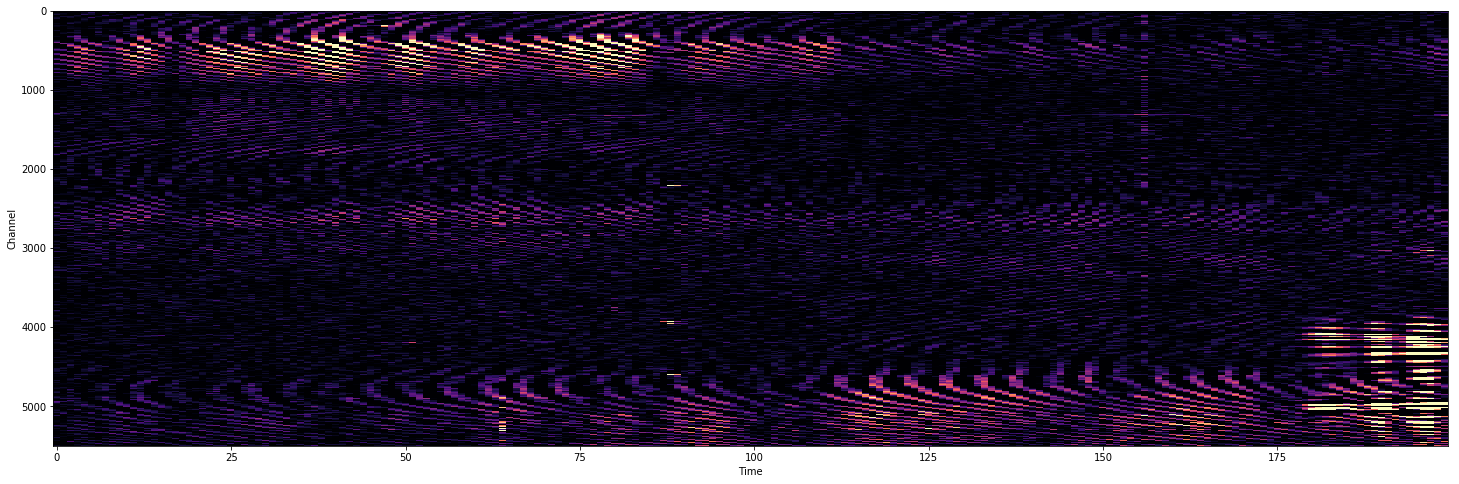

In [10]:
import matplotlib.pyplot as plt
# create figure of specified size
fig = plt.figure(figsize=(25,8))

palette = plt.cm.magma

# plot data in top panel
ax1 = fig.add_subplot(111)
#im = ax1.imshow(abs(readin_r.transpose()), cmap=palette,aspect='auto')
im = ax1.imshow(a[:,2].reshape(5500,200)
                , cmap = palette, aspect='auto',  vmax=5,vmin=0)
ax1.set_xlabel('Time')
ax1.set_ylabel('Channel')


plt.show(block=True)